<a href="https://colab.research.google.com/github/Blackman9t/Python_-_Statistics_for_Financial_Analysis/blob/master/2_Create%2Bnew%2Bfeatures%2Band%2Bcolumns%2Bin%2BDataFrame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create features and columns in DataFrame
In this Jupyter Notebook, you will practice the following codes to create new features/columns in a DataFrame

1. Create new columns in the DataFrame by arithmetic calculation - Price Difference and Daily Return

2. Create a new column using List Comprehension - Direction

3. Create a new column using Rolling Window Calculation - Any days of Moving Average



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
fb = pd.DataFrame.from_csv('https://raw.githubusercontent.com/Blackman9t/Python_-_Statistics_for_Financial_Analysis/master/facebook.csv')
ms = pd.DataFrame.from_csv('https://raw.githubusercontent.com/Blackman9t/Python_-_Statistics_for_Financial_Analysis/master/microsoft.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


## Create a new column in the DataFrame (1) - Price difference

In [18]:
fb.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000


In [0]:
#Create a new column PriceDiff in the DataFrame fb
fb.insert(fb.columns.get_loc('Close')+1, 'PriceDiff', fb['Close'].shift(-1) - fb['Close']) # Thus first row of PriceDiff is 2nd row of Close - first row of close

Thus first row of PriceDiff is 2nd row of Close - first row of Close

In [20]:
fb.head(3)

,Open,High,Low,Close,PriceDiff,Adj Close,Volume
Date,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,0.080000,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,-0.339998,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,-0.600000,19.206934,4948800


In [21]:
#Your turn to create PriceDiff in the DataFrame ms
ms.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.73,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.66,47.419998,46.540001,46.759998,43.134731,27913900


In [22]:
ms.insert(ms.columns.get_loc('Close')+1, 'PriceDiff', ms['Close'].shift(-1) - ms['Close']) # Thus first row of PriceDiff is 2nd row of Close - first row of close
ms.head(3)

,Open,High,Low,Close,PriceDiff,Adj Close,Volume
Date,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,0.309997,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,-0.429996,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,-0.680000,42.738068,39673900


In [23]:
#Run this code to display the price difference of Microsoft on 2015-01-05
print(ms['PriceDiff'].loc['2015-01-05'])

-0.6799999999999997


** Expected Output: ** -0.68

## Create a new column in the DataFrame (2) - Daily return

Daily Return is calcuated as PriceDiff/Close

In [0]:
#Create a new column Return in the DataFrame fb
fb.insert(fb.columns.get_loc('PriceDiff')+1, 'Return', fb.PriceDiff/fb.Close) 

In [25]:
fb.head(3)

,Open,High,Low,Close,PriceDiff,Return,Adj Close,Volume
Date,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,0.080000,0.003990,19.459270,4157500
2015-01-02,20.129999,20.280001,19.809999,20.129999,-0.339998,-0.016890,19.536913,2842000
2015-01-05,20.129999,20.190001,19.700001,19.790001,-0.600000,-0.030318,19.206934,4948800


In [26]:
#Your turn to create a new column Return in the DataFrame MS
ms.insert(ms.columns.get_loc('PriceDiff')+1, 'Return', ms.PriceDiff/ms.Close) 
ms.head(3)

,Open,High,Low,Close,PriceDiff,Return,Adj Close,Volume
Date,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,0.309997,0.006674,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,-0.429996,-0.009196,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,-0.680000,-0.014677,42.738068,39673900


In [27]:
#Run this code to print the return on 2015-01-05
print(ms['Return'].loc['2015-01-05'])

-0.014677314281143345


** Expected Output: ** -0.0146773142811

## Create a new column in the DataFrame using List Comprehension - Direction

In [28]:
#Create a new column Direction. 
#The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0,
#for every record in the DataFrame - fb

fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index ]

fb.head()

,Open,High,Low,Close,PriceDiff,Return,Adj Close,Volume,Direction
Date,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,0.080000,0.003990,19.459270,4157500,1
2015-01-02,20.129999,20.280001,19.809999,20.129999,-0.339998,-0.016890,19.536913,2842000,0
2015-01-05,20.129999,20.190001,19.700001,19.790001,-0.600000,-0.030318,19.206934,4948800,0
2015-01-06,19.820000,19.840000,19.170000,19.190001,-0.050002,-0.002606,18.624611,4944100,0
2015-01-07,19.330000,19.500000,19.080000,19.139999,0.720002,0.037618,18.576082,8045200,1


In [31]:
# Your turn to create a new column Direction for MS

ms['Direction'] = [1 if ms.PriceDiff.loc[ei] > 0 else 0 for ei in ms.index]

ms.head()

,Open,High,Low,Close,PriceDiff,Return,Adj Close,Volume,Direction
Date,,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,0.309997,0.006674,42.848763,21552500,1
2015-01-02,46.660000,47.419998,46.540001,46.759998,-0.429996,-0.009196,43.134731,27913900,0
2015-01-05,46.369999,46.730000,46.250000,46.330002,-0.680000,-0.014677,42.738068,39673900,0
2015-01-06,46.380001,46.750000,45.540001,45.650002,0.579998,0.012705,42.110783,36447900,1
2015-01-07,45.980000,46.459999,45.490002,46.230000,1.360000,0.029418,42.645817,29114100,1


In [32]:
# Run the following code to show the price difference on 2015-01-05
print('Price difference on {} is {}. direction is {}'.format('2015-01-05', ms['PriceDiff'].loc['2015-01-05'], ms['Direction'].loc['2015-01-05']))

Price difference on 2015-01-05 is -0.6799999999999997. direction is 0


** Expected Output: ** Price difference on 2015-01-05 is -0.6799999999999997. direction is 0

## Create a new column in the DataFrame using Rolling Window calculation (.rolling()) - Moving average

The built-in .rolling() method calculates moving average for any number of inputted days

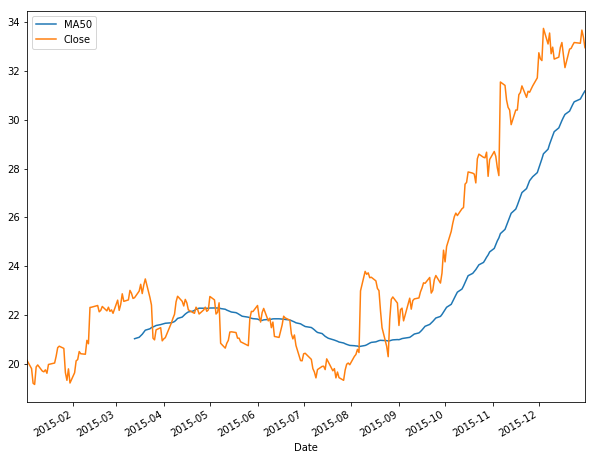

In [50]:
fb['ma50'] = fb['Close'].rolling(50).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
fb['ma50'].loc['2015-01-01':'2015-12-31'].plot(label='MA50')
fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

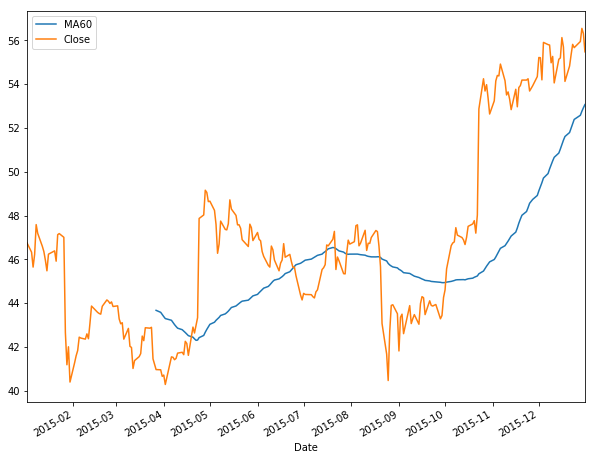

In [51]:
# You can use .rolling() to calculate any numbers of days' Moving Average. This is your turn to calculate "60 days"
# moving average of Microsoft, rename it as "ma60". And follow the codes above in plotting a graph

ms['ma60'] = ms['Close'].rolling(60).mean()

#plot the moving average
plt.figure(figsize=(10, 8))
ms['ma60'].loc['2015-01-01':'2015-12-31'].plot(label='MA60')
ms['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

** Expected Output: **

<img src="https://github.com/Blackman9t/Python_-_Statistics_for_Financial_Analysis/blob/master/MA.png?raw=true" height=500 width=650>

In [0]:
# run this cell to kill the notebook and free up space in colab

import os, signal
os.kill(os.getpid(), signal.SIGKILL)